#### Data Analysis Using Python:  
Data cleaning is the initial default task. The following steps shall be applied in the cleaning process:  
 -Duplicate check  
 -Missing values check  
 -Transformation if any.  
 
The data source: Kaggle (pizza sales report).pandas and numpy libraries will be imported for this purpose.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# bring in the dataset for analysis
df = pd.read_excel(r'C:\Users\user\Desktop\flocode_project.xlsx')

In [3]:
# view the top and bottowm layers of the dataset
df.clip()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,NaN,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
# confirm the number rows & columns
df.shape

(48620, 11)

In [5]:
# check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0      pizza_id                          48620 non-null  int64         
 1   order_id                             48620 non-null  int64         
 2      pizza_name_id                     48620 non-null  object        
 3   quantity                             48620 non-null  int64         
 4   order_date                           48620 non-null  datetime64[ns]
 5   order_time                           48620 non-null  object        
 6   unit_price                           48603 non-null  float64       
 7   pizza_size                           48620 non-null  object        
 8   pizza_category                       48620 non-null  object        
 9                     pizza_ingredients  48620 non-null  object        
 10  pizza_name

In [6]:
# view the unique values contained in the different columns in the dataset
for col in df.columns:
    values = df[col].unique()
    print(f'{col}:{values}')

   pizza_id:[    1     2     3 ... 48618 48619 48620]
order_id:[    1     2     3 ... 21348 21349 21350]
   pizza_name_id:['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' 'soppressata_l'
 'four_cheese_l' 'napolitana_s' 'calabrese_m' 'four_cheese_m'
 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s' 'spinach_fet_l'
 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m' 'southw_ckn_s' 'bbq_ckn_m'
 'pepperoni_m' 'prsc_argla_s' 'sicilian_m' 'veggie_veg_l' 'ckn_alfredo_s'
 'pepperoni_s' 'green_garden_l' 'green_garden_m' 'pep_msh_pep_l'
 'hawaiian_s' 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l'
 'spin_pesto_s' 'thai_ckn_m' 'classic_dlx_l' 'ckn_pest

#### Cleaning Step 1 - Check for Duplicates and Remove

In [7]:
# duplicate check to see the sum
df.duplicated().sum()

0

#### Cleaning Step 2 - Check for Missing Values. Remove or Replace

In [8]:
# check the missing values in the data
df.isnull().sum()

   pizza_id                             0
order_id                                0
   pizza_name_id                        0
quantity                                0
order_date                              0
order_time                              0
unit_price                             17
pizza_size                              0
pizza_category                          0
                  pizza_ingredients     0
pizza_name                              0
dtype: int64

In [9]:
# display in percentage to know the columns to drop. by principle, any column having > 30% of NaN values is taken off.
pd.DataFrame(data = {"% of Missing Values": round(df.isnull().sum()/len(df)*100,3)}).sort_values(by = "% of Missing Values", ascending = False) 

,% of Missing Values
unit_price,0.035
pizza_id,0.000
order_id,0.000
pizza_name_id,0.000
quantity,0.000
order_date,0.000
order_time,0.000
pizza_size,0.000
pizza_category,0.000
pizza_ingredients,0.000


#### Based on the above display, the unit price column  will be filled with the median value

In [10]:
# obtain the median value for age column
df['unit_price'].median()

16.5

In [11]:
# input the median value to fill up the NaN in age column
df['unit_price'].fillna('16.5',inplace = True)

In [12]:
# confirm that all missing values are addressed
df.isnull().sum()

   pizza_id                            0
order_id                               0
   pizza_name_id                       0
quantity                               0
order_date                             0
order_time                             0
unit_price                             0
pizza_size                             0
pizza_category                         0
                  pizza_ingredients    0
pizza_name                             0
dtype: int64

#### Cleaning Step - 3. Transformation.  
The column unit price will be changed as a float, then rounded up to 2 decimal value

In [13]:
df['unit_price'] = df['unit_price'].astype(float)
print(df['unit_price'].dtype)

float64


In [14]:
df['unit_price'] = df['unit_price'].round(3)
df[['unit_price']]

,unit_price
0,13.25
1,16.00
2,18.50
3,16.50
4,16.00
...,...
48615,16.75
48616,17.95
48617,12.00
48618,20.25


#### EDA. Exploratory Data Analyasis.

Here the dataset will be explored to answer the following questions:

 -what is the total revenue.  
 -what is the total quantity of pizza sold.  
 -what is the total disticnt order volume of piza.  
 -average quantity of pizza per order.  
 -average amount per pizza order.  
 -hourly trend for total orders.  
 -weekly trend for total orders.  
 -monthly trend for total orders.  
 -percentageof sales by pizza category.  
 -percentage of sales by pizza size.  
 -top 10 sellers by revenue, quantity and orders.  
 -buttom 5 sellers by revenue, quantity and orders.
 
 The libraries matplotlip and seaborn will be imported for this purpose.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# cursory glace at the table
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,16.50,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


#### Solution 1 - total revenue

In [17]:
total_revenue = (df['quantity']*df['unit_price']).sum()
total_revenue

817793.8

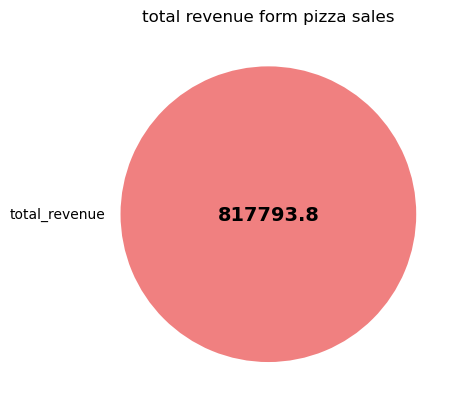

In [18]:
# The display
total_revenue = 817793.8

# Plot
fig, ax = plt.subplots()
ax.pie([total_revenue], labels=["total_revenue"], colors=['lightcoral'])

# Add the total count inside the pie chart
ax.text(0, 0, str(total_revenue), ha='center', va='center', fontsize=14, fontweight='bold', color='black')

# Title
plt.title("total revenue form pizza sales")

plt.show()

#### Solution 2 - total quantity of pizza sold

In [19]:
# total pizza quantity
df['quantity'].sum()

49574

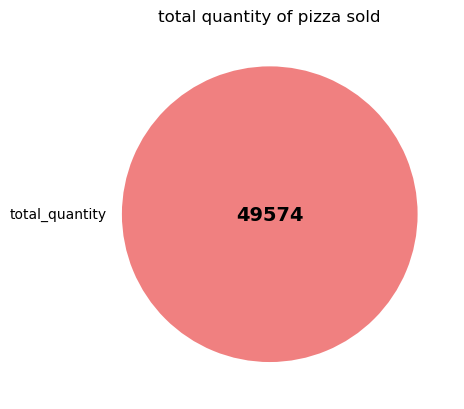

In [20]:
# The display
total_quantity = 49574

# Plot
fig, ax = plt.subplots()
ax.pie([total_quantity], labels=['total_quantity'], colors=['lightcoral'])

# Add the total count inside the pie chart
ax.text(0, 0, str(total_quantity), ha='center', va='center', fontsize=14, fontweight='bold', color='black')

# Title
plt.title("total quantity of pizza sold")

plt.show()

#### Solution 3 - total distinct order volume of pizza

In [21]:
# change df[order_id] to an object
df['order_id'] = df['order_id'].astype(object)

# total distinct order volume of pizza sold
df['order_id'].nunique()

21350

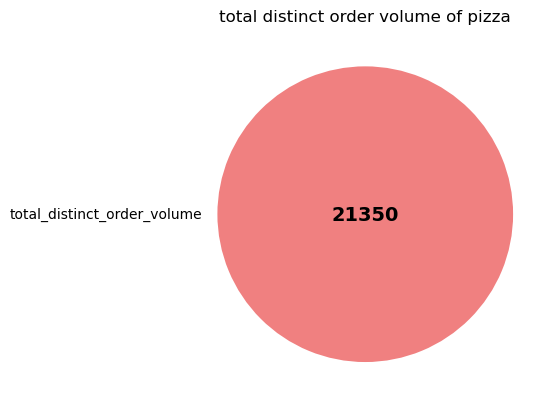

In [22]:
# The display
total_distinct_order_volume = 21350

# Plot
fig, ax = plt.subplots()
ax.pie([total_distinct_order_volume], labels=['total_distinct_order_volume'], colors=['lightcoral'])

# Add the total count inside the pie chart
ax.text(0, 0, str(total_distinct_order_volume), ha='center', va='center', fontsize=14, fontweight='bold', color='black')

# Title
plt.title("total distinct order volume of pizza")

plt.show()

#### Solution 4 - average quantity of pizza per order

In [23]:
average_qty_pizza_perorder = round(df['quantity'].sum()/df['order_id'].nunique()*1,2)
average_qty_pizza_perorder

2.32

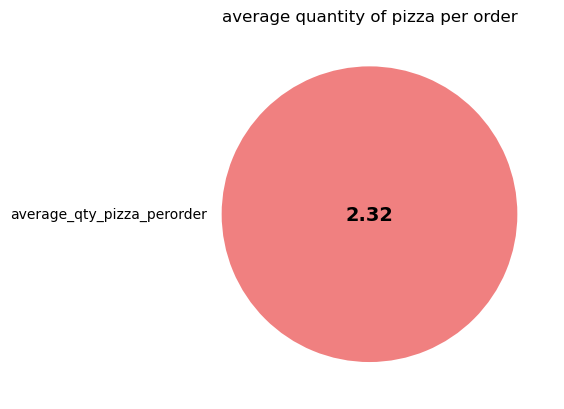

In [24]:
# The display
average_qty_pizza_perorder = 2.32

# Plot
fig, ax = plt.subplots()
ax.pie([average_qty_pizza_perorder], labels=['average_qty_pizza_perorder'], colors=['lightcoral'])

# Add the total count inside the pie chart
ax.text(0, 0, str(average_qty_pizza_perorder), ha='center', va='center', fontsize=14, fontweight='bold', color='black')

# Title
plt.title("average quantity of pizza per order")

plt.show()

#### Solution 5 - average amount per pizza order

In [25]:
average_amount_pizza_perorder = round((df['quantity']*df['unit_price']).sum()/df['order_id'].nunique()*1,2)
average_amount_pizza_perorder 

38.3

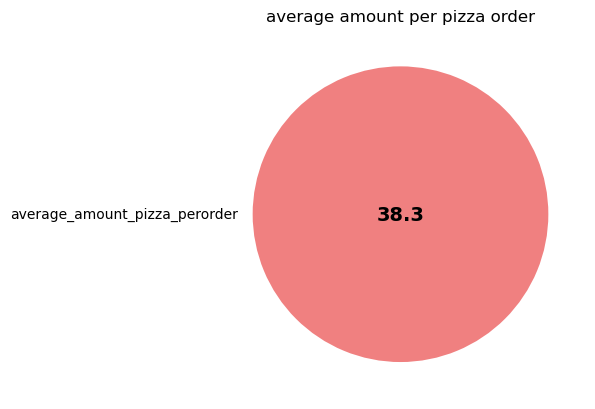

In [26]:
# The display
average_amount_pizza_perorder  = 38.3

# Plot
fig, ax = plt.subplots()
ax.pie([average_amount_pizza_perorder], labels=['average_amount_pizza_perorder'], colors=['lightcoral'])

# Add the total count inside the pie chart
ax.text(0, 0, str(average_amount_pizza_perorder), ha='center', va='center', fontsize=14, fontweight='bold', color='black')

# Title
plt.title("average amount per pizza order")

plt.show()

#### Solution 6 - hourly trend of total pizza order

#### Further transformation will be done on the dataset these are:  
 -convert date column to datetime.  
 -create a new column called time period to segment the ordertime  
 -create a new column to contain the monthly record.  
 -create a new column called week time

In [27]:
# convert to datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['order_time']= pd.to_datetime(df['order_time'], format ='%H:%M:%S' )
print(df['order_date'].dtype)
print(df['order_time'].dtype)

datetime64[ns]
datetime64[ns]


In [28]:
# extract the month, week and hour as stand alone columns
df['monthly_trend'] = df['order_date'].dt.month_name()
df['week_time'] = df['order_date'].dt.isocalendar().week
df['hour_time'] = df['order_time'].dt.hour

In [29]:
# check the operation
df[['monthly_trend','week_time','hour_time']]

,monthly_trend,week_time,hour_time
0,January,1,11
1,January,1,11
2,January,1,11
3,January,1,11
4,January,1,11
...,...,...,...
48615,December,53,21
48616,December,53,21
48617,December,53,21
48618,December,53,22


In [30]:
# creat new colunm timeperiod to segement ordertime.create a function and use apply method to effect it.
def time_period_classifier(time):
    if time.hour >= 1 and time.hour <= 11:
        return 'morning'
    elif time.hour >= 12 and time.hour <= 15:
        return 'afternoon'
    elif time.hour >= 16 and time.hour <= 18:
        return 'evening'
    else:
        return 'night'
            
                                                     
# apply the function to reflect the new age band
df['time_period'] = df['order_time'].apply(time_period_classifier)

In [31]:
# check the operation
df[['time_period']]

,time_period
0,morning
1,morning
2,morning
3,morning
4,morning
...,...
48615,night
48616,night
48617,night
48618,night


In [32]:
hourly_trend = df.groupby('hour_time')['order_id'].count()
hourly_trend

hour_time
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: order_id, dtype: int64

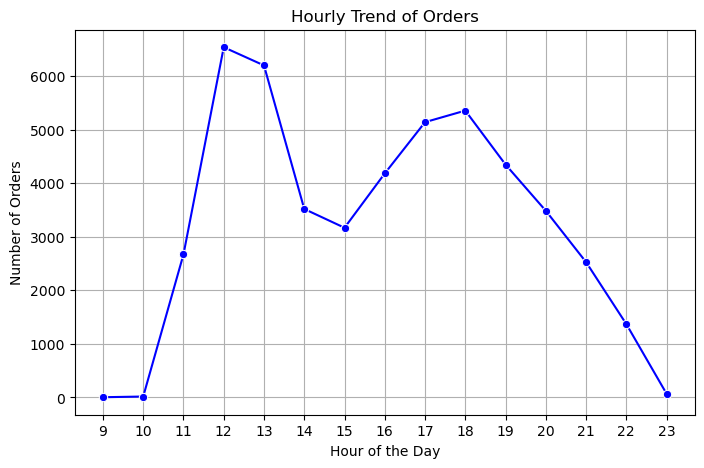

In [33]:
# diagram

plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker='o', color='b')

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Hourly Trend of Orders")
plt.xticks(range(9, 24))  # Display hours
plt.grid(True)

plt.show()

#### Solution - 7 weekly trend of total orders

In [34]:
weekly_trend = df.groupby('week_time')['order_id'].count()
weekly_trend

week_time
1      581
2      951
3      898
4      952
5      962
6      972
7      960
8      914
9      957
10     971
11     944
12     936
13     944
14    1001
15     949
16     952
17     953
18     918
19     963
20    1027
21     926
22     909
23     983
24     931
25     906
26     961
27    1048
28     932
29     963
30     957
31     905
32     938
33     981
34     938
35     852
36     931
37     994
38     953
39     658
40     986
41     775
42     911
43     862
44     794
45     960
46     923
47     888
48    1159
49     996
50     942
51     950
52     680
53     423
Name: order_id, dtype: int64

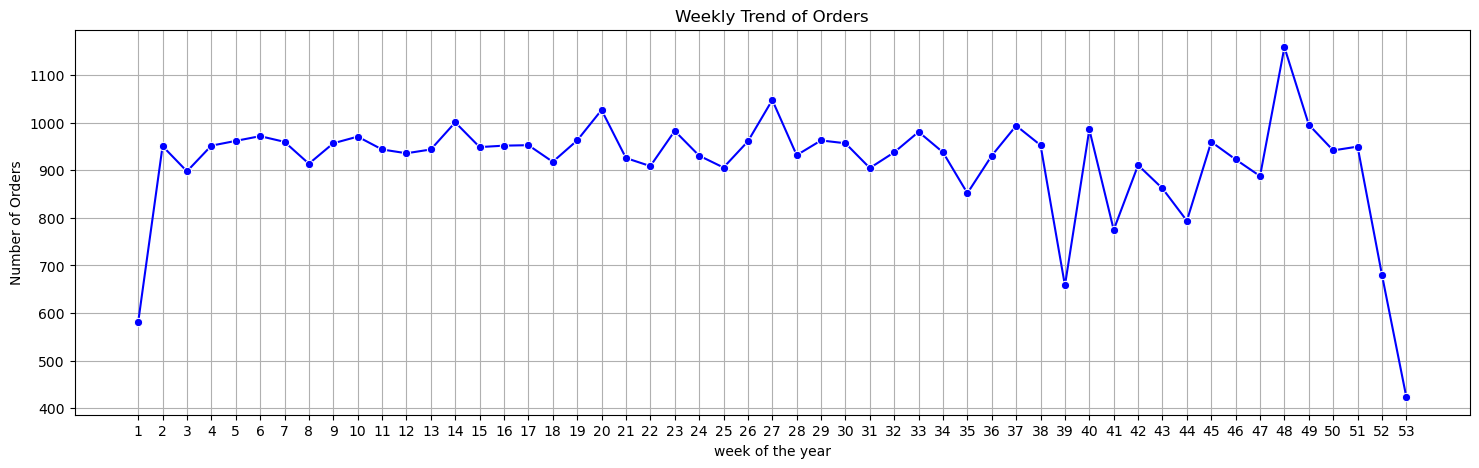

In [35]:
# Convert index to integer
weekly_trend.index = weekly_trend.index.astype(int)

plt.figure(figsize=(18, 5))
sns.lineplot(x=weekly_trend.index, y=weekly_trend.values, marker='o', color='b')

plt.xlabel("week of the year")
plt.ylabel("Number of Orders")
plt.title("Weekly Trend of Orders")
plt.xticks(range(1, 54))  # Display weeks
plt.grid(True)

plt.show()

#### Solution 7 - monthly trend of total orders

In [36]:
# Define the correct month order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
# Convert 'monthly_trend' to a categorical type with the correct order
df['monthly_trend'] = pd.Categorical(df['monthly_trend'], categories=month_order, ordered=True)

month_trend = df.groupby('monthly_trend')['order_id'].count()
month_trend

monthly_trend
January      4156
February     3892
March        4186
April        4067
May          4239
June         4025
July         4301
August       4094
September    3819
October      3797
November     4185
December     3859
Name: order_id, dtype: int64

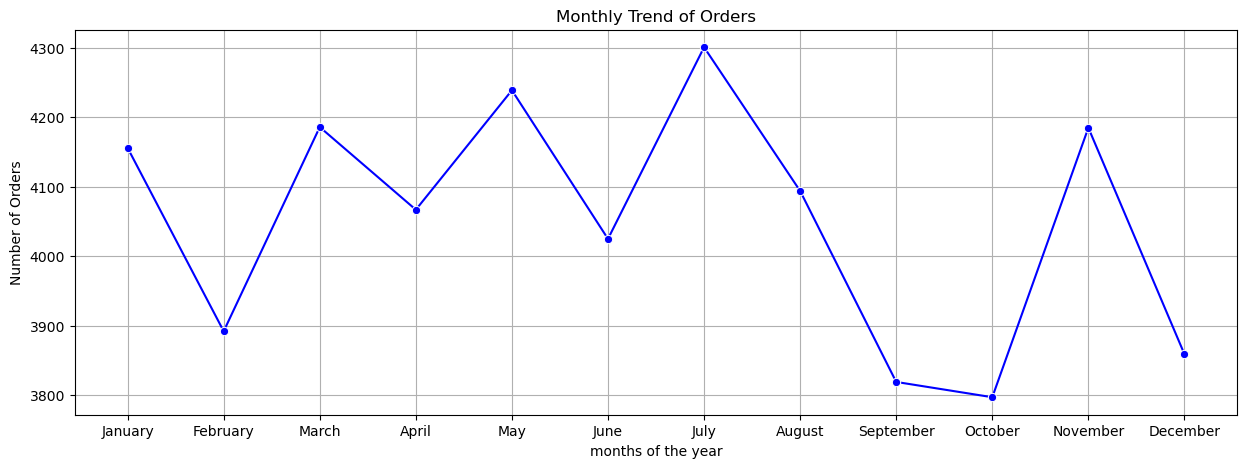

In [37]:
# diagram

plt.figure(figsize=(15, 5))
sns.lineplot(x=month_trend.index, y=month_trend.values, marker='o', color='b')

plt.xlabel("months of the year")
plt.ylabel("Number of Orders")
plt.title("Monthly Trend of Orders")
plt.grid(True)

plt.show()

#### Solution 8 - percentage of sales by pizza category

In [38]:
# create a new column, total revenue
df['total_revenue'] = df['quantity']*df['unit_price']
df[['total_revenue']].sum()

total_revenue    817793.8
dtype: float64

In [39]:
category_revenue = df.groupby('pizza_category')['total_revenue'].size()
pct_sales_category = round((category_revenue/category_revenue.sum())*100,1).sort_values()
pct_sales_category

pizza_category
Chicken    22.2
Veggie     23.5
Supreme    24.2
Classic    30.0
Name: total_revenue, dtype: float64

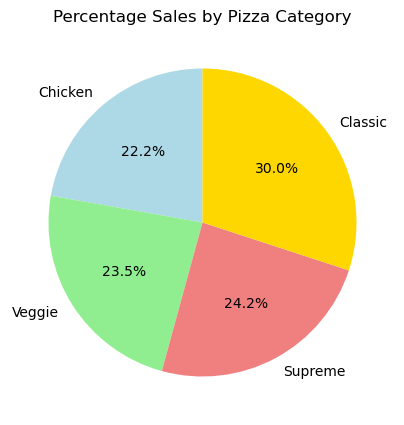

In [40]:
# Data
pizza_category = ["Chicken", "Veggie", "Supreme", "Classic"]
percentage_sales = [22.2, 23.5, 24.2, 30.0]

# Plot
plt.figure(figsize=(5, 5))
plt.pie(percentage_sales, labels=pizza_category, autopct='%1.1f%%',startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])

# Title
plt.title("Percentage Sales by Pizza Category")
plt.show()

#### Solution 9 - percentage of sales by pizza size

In [41]:
size_revenue = df.groupby('pizza_size')['total_revenue'].size()
pct_sales_size = round((size_revenue/size_revenue.sum())*100,1).sort_values()
pct_sales_size

pizza_size
XXL     0.1
XL      1.1
S      29.1
M      31.6
L      38.1
Name: total_revenue, dtype: float64

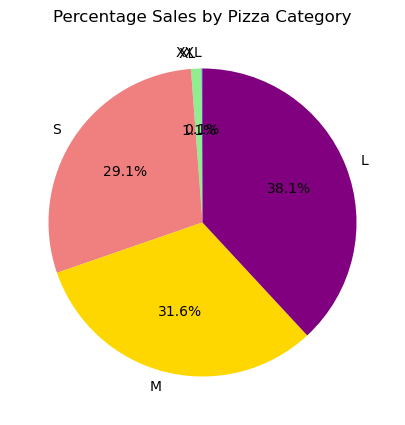

In [42]:
# Data
pizza_category = ["XXL", "XL", "S", "M", 'L']
percentage_sales = [0.1, 1.1, 29.1, 31.6, 38.1]

# Plot
plt.figure(figsize=(7, 5))
plt.pie(percentage_sales, labels=pizza_category, autopct='%1.1f%%',startangle=90, colors=['blue', 'lightgreen', 'lightcoral', 'gold', 'purple'])

# Title
plt.title("Percentage Sales by Pizza Category")
plt.show()

#### Solution 10 - top 10 sellers by revenue, quantity and orders

In [66]:
# top 10 by revenue
top_10_sellers_revenue = df.groupby('pizza_name')['total_revenue'].sum()
revenue_top10 = top_10_sellers_revenue.sort_values(ascending=False).head(10)
revenue_top10 

pizza_name
The Thai Chicken Pizza          43425.75
The Barbecue Chicken Pizza      42763.75
The California Chicken Pizza    41405.00
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
The Southwest Chicken Pizza     34693.00
The Italian Supreme Pizza       33464.00
The Hawaiian Pizza              32273.25
The Four Cheese Pizza           32265.70
The Sicilian Pizza              30933.00
Name: total_revenue, dtype: float64

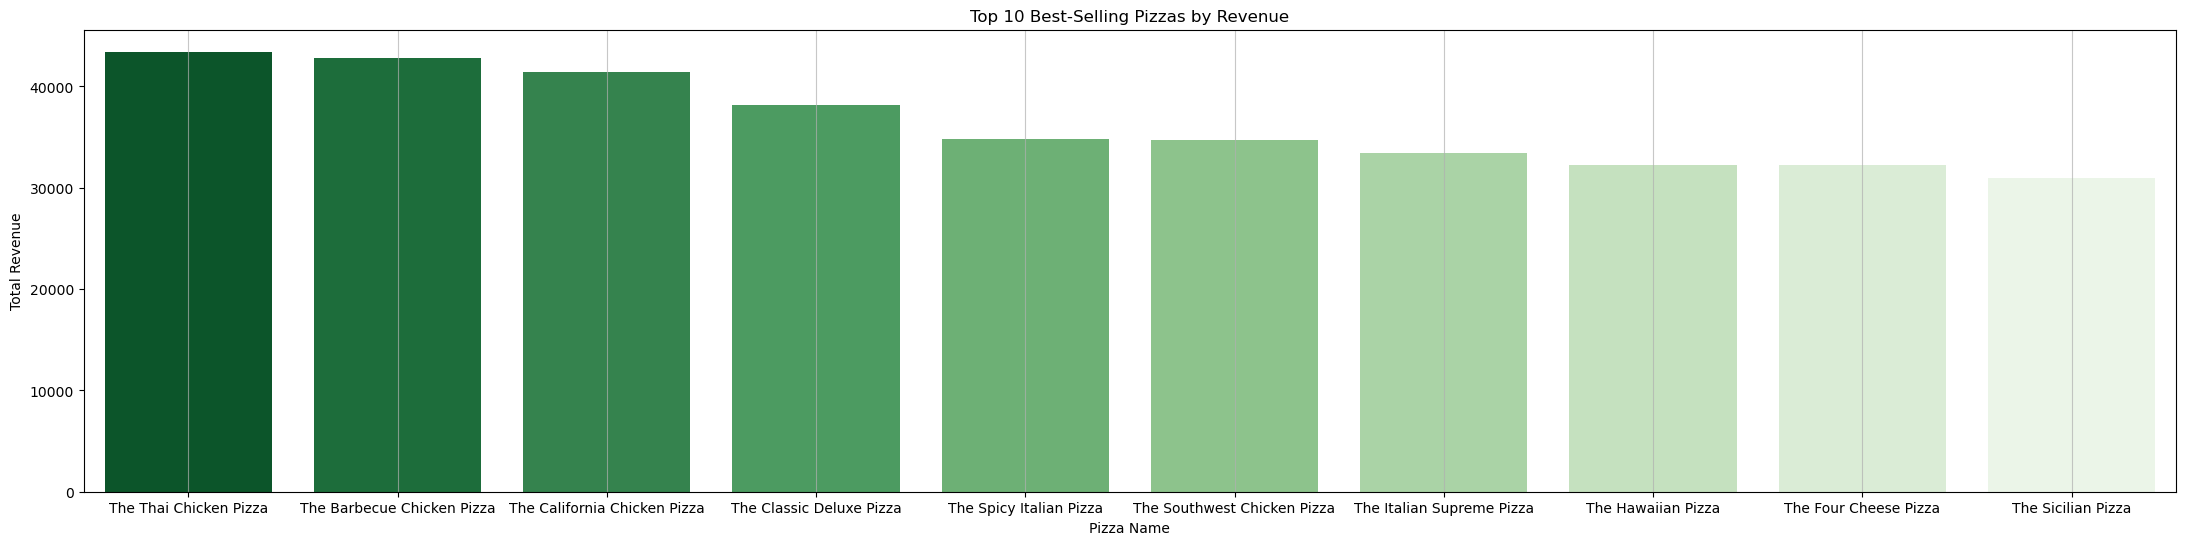

In [90]:
# the chart
plt.figure(figsize=(27, 6))
sns.barplot(x=revenue_top10.index, y=revenue_top10.values, palette="Greens_r")

plt.xlabel('Pizza Name')
plt.ylabel("Total Revenue")
plt.title("Top 10 Best-Selling Pizzas by Revenue")
plt.xticks(rotation=0)
plt.grid(axis='x', alpha=0.7)

plt.show()

In [74]:
# top 10 by quntity
top_10_sellers_quantity = df.groupby('pizza_name')['quantity'].sum()
quantity_top10 = top_10_sellers_quantity.sort_values(ascending=False).head(10)
quantity_top10

pizza_name
The Classic Deluxe Pizza        2453
The Barbecue Chicken Pizza      2432
The Hawaiian Pizza              2422
The Pepperoni Pizza             2418
The Thai Chicken Pizza          2371
The California Chicken Pizza    2370
The Sicilian Pizza              1938
The Spicy Italian Pizza         1924
The Southwest Chicken Pizza     1917
The Big Meat Pizza              1914
Name: quantity, dtype: int64

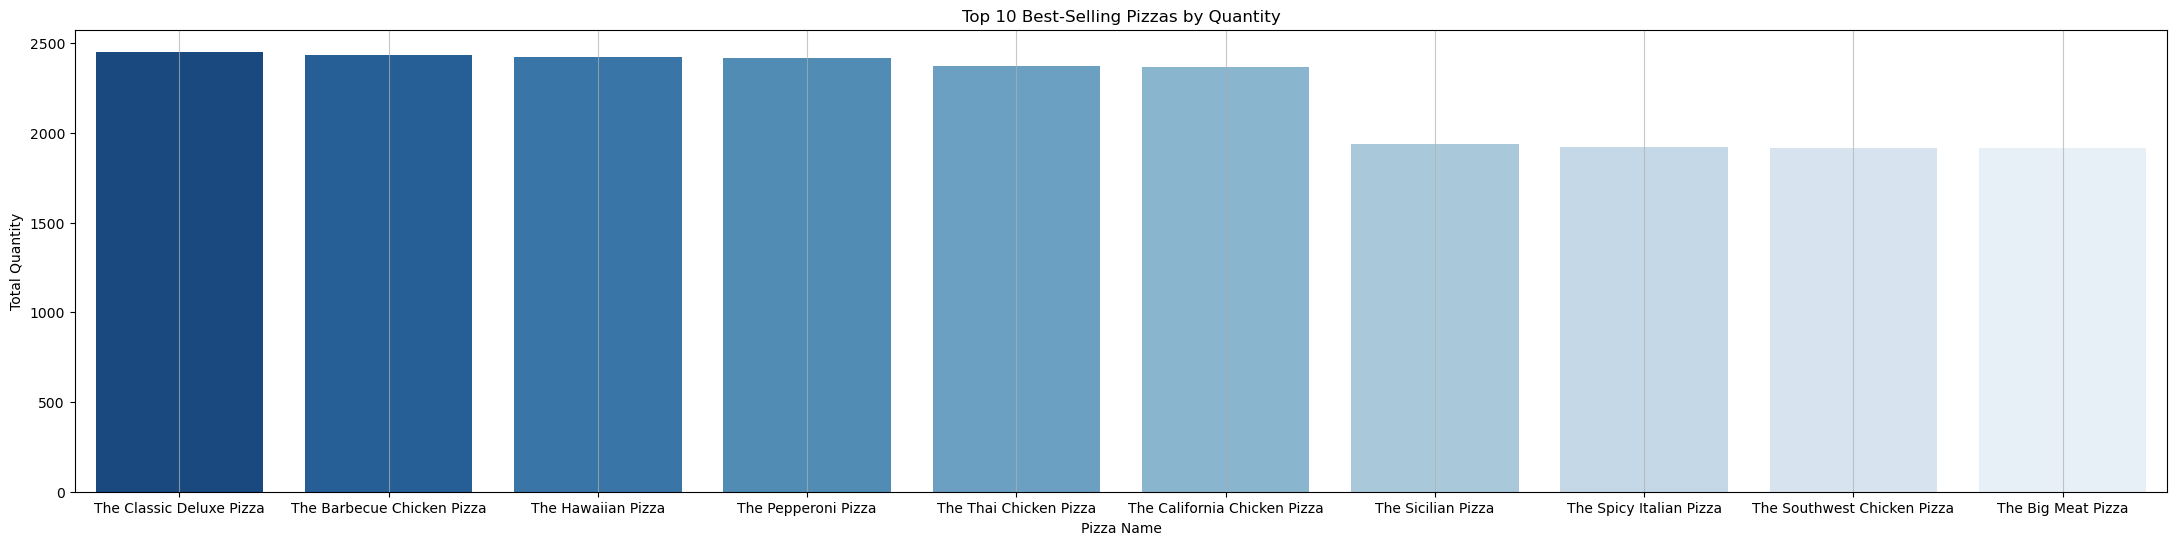

In [89]:
# the chart
plt.figure(figsize=(27, 6))
sns.barplot(x=quantity_top10.index, y=quantity_top10.values, palette="Blues_r")

plt.xlabel('Pizza Name')
plt.ylabel("Total Quantity")
plt.title("Top 10 Best-Selling Pizzas by Quantity")
plt.xticks(rotation=0)
plt.grid(axis='x', alpha=0.7)

plt.show()

In [84]:
# top 10 by orders
top_10_sellers_order = df.groupby('pizza_name')['order_id'].nunique()
orders_top10 = top_10_sellers_order.sort_values(ascending=False).head(10)
orders_top10

pizza_name
The Classic Deluxe Pizza        2329
The Hawaiian Pizza              2280
The Pepperoni Pizza             2278
The Barbecue Chicken Pizza      2273
The Thai Chicken Pizza          2225
The California Chicken Pizza    2197
The Southwest Chicken Pizza     1825
The Spicy Italian Pizza         1822
The Sicilian Pizza              1820
The Big Meat Pizza              1811
Name: order_id, dtype: int64

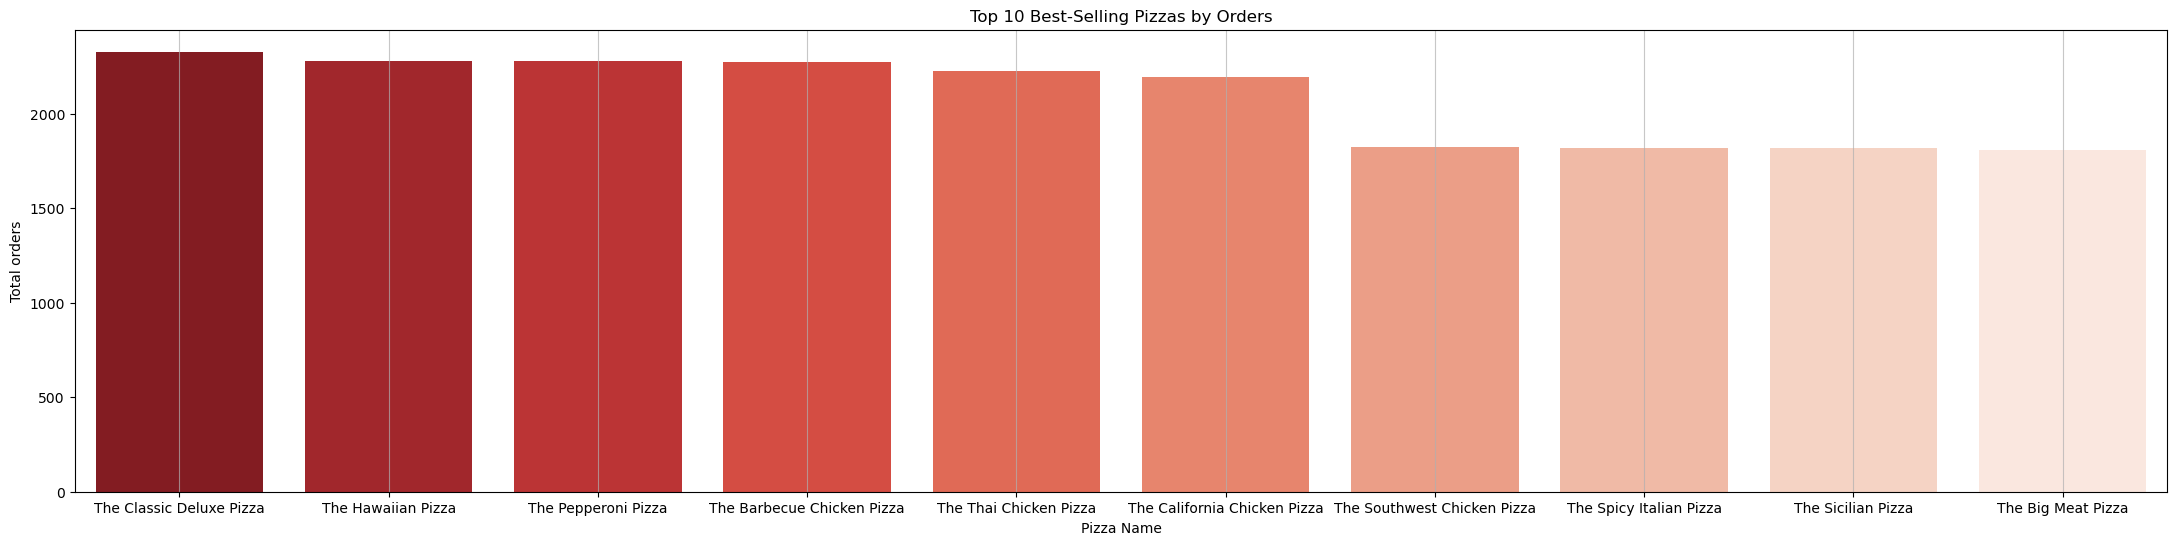

In [88]:
# the chart
plt.figure(figsize=(27, 6))
sns.barplot(x=orders_top10.index, y=orders_top10.values, palette="Reds_r")

plt.xlabel('Pizza Name')
plt.ylabel("Total orders")
plt.title("Top 10 Best-Selling Pizzas by Orders")
plt.grid(axis='x', alpha=0.7)

plt.show()

#### Solution 11 - bottom 5 sellers

In [91]:
# button 5 for revenue
buttom_5_sellers_revenue = df.groupby('pizza_name')['total_revenue'].sum()
revenue_buttom_5 = buttom_5_sellers_revenue.sort_values(ascending=False).tail(5)
revenue_buttom_5

pizza_name
The Spinach Pesto Pizza      15596.00
The Mediterranean Pizza      15360.50
The Spinach Supreme Pizza    15273.50
The Green Garden Pizza       13955.75
The Brie Carre Pizza         11588.50
Name: total_revenue, dtype: float64

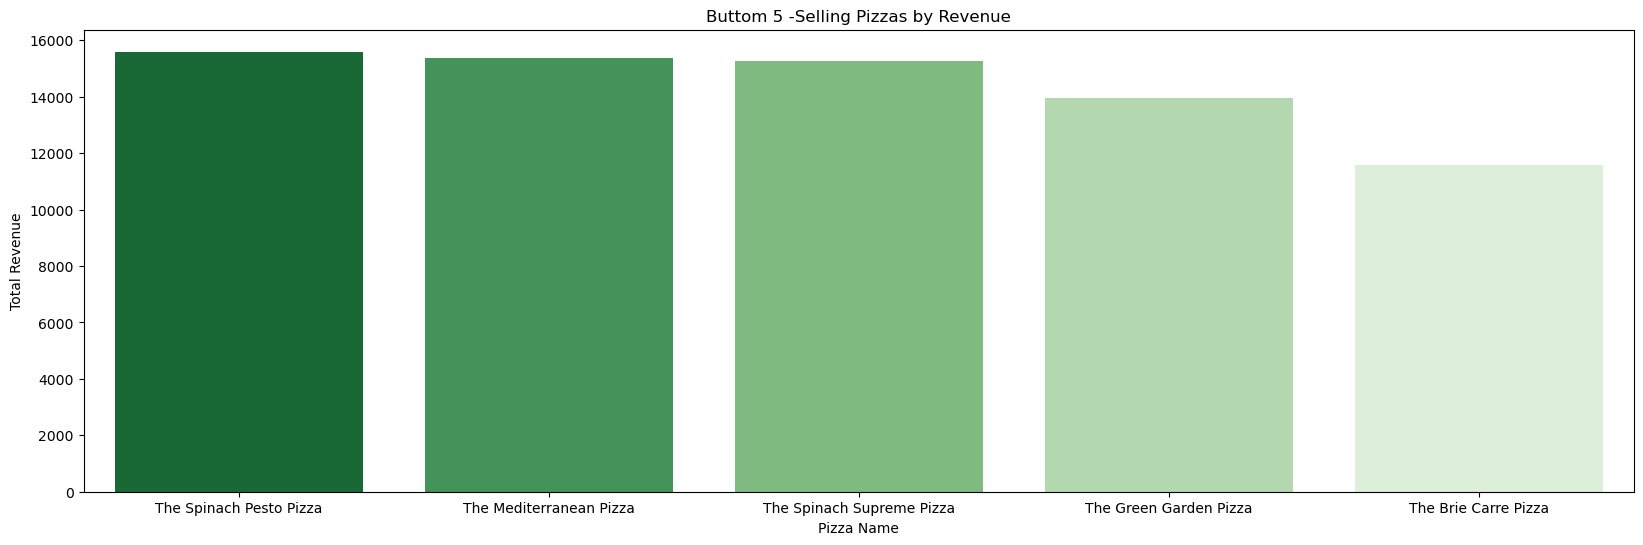

In [94]:
# the chart
plt.figure(figsize=(20, 6))
sns.barplot(x=revenue_buttom_5.index, y=revenue_buttom_5.values, palette="Greens_r")

plt.xlabel('Pizza Name')
plt.ylabel("Total Revenue")
plt.title("Buttom 5 -Selling Pizzas by Revenue")

plt.show()

#### The End.